In [4]:
!pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#firstly checking  url to download dataset
inspections_url = 'Building_and_Safety_Inspections_20250219.csv'
permit_info_url =  'Building_and_Safety_Permit_Information_Old_20250219.csv'
inspections_d = pd.read_csv(inspections_url)
permit_info_d = pd.read_csv(permit_info_url)

C:\Users\fatim\AppData\Local\Temp\ipykernel_26608\3922637176.py:4: DtypeWarning: Columns (2,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  inspections_d = pd.read_csv(inspections_url)
C:\Users\fatim\AppData\Local\Temp\ipykernel_26608\3922637176.py:5: DtypeWarning: Columns (0,1,14) have mixed types. Specify dtype option on import or set low_memory=False.
  permit_info_d = pd.read_csv(permit_info_url)


In [9]:
# Display the first few rows of each dataset
print("Inspections Dataset:")
print(inspections_d.shape)
print(inspections_d.head(100))

print("\nPermits Dataset:")
print(permit_info_d.shape)
print(permit_info_d.head())

Inspections Dataset:
(10237490, 7)
                      ADDRESS             PERMIT     Permit Status  \
0   10000 W SANTA MONICA BLVD  14044 10000 02293            Issued   
1         1000 S SANTA FE AVE  15016 10000 18196    Permit Finaled   
2        3680 N BUENA PARK DR  15014 10000 04931            Issued   
3      1001 N LINDENWOOD LANE  16042 90000 14712    Permit Finaled   
4           2836 S ANCHOR AVE  15016 20001 17211       CofO Issued   
..                        ...                ...               ...   
95       11933 W ALLEGHENY ST  15010 10001 03635            Issued   
96           275 W CENTER WAY  15020 10000 00585  CofO in Progress   
97            649 N CROSS AVE  13010 10000 03132            Issued   
98             1150 W 25TH ST  16016 70001 06892            Issued   
99         1332 N EL HITO CIR  15043 20000 03270    Permit Finaled   

   Inspection Date          Inspection Type         Inspection Result  \
0       07/20/2016        Rough-Ventilation        

In [10]:
# Check for missing values
print("Missing values \n In Inspections Dataset:")
print(inspections_d.isnull().sum())

print("\nIn Permits Dataset:")
print(permit_info_d.isnull().sum())

# Check data types
print("\nData types \nIn Inspections Dataset:")
print(inspections_d.dtypes)

print("\nIn Permits Dataset:")
print(permit_info_d.dtypes)

Missing values 
 In Inspections Dataset:
ADDRESS                    1
PERMIT                     0
Permit Status         481120
Inspection Date       205257
Inspection Type       481137
Inspection Result     481419
Latitude/Longitude    481120
dtype: int64

In Permits Dataset:
Assessor Book                                  1570
Assessor Page                                  1570
Assessor Parcel                                1570
Tract                                          6415
Block                                       1320360
Lot                                           10770
Reference # (Old Permit #)                   938000
PCIS Permit #                                     0
Status                                            0
Status Date                                       0
Permit Type                                       0
Permit Sub-Type                                   0
Permit Category                                   0
Project Number                              16

## Q1

In [11]:
inspections_df = pd.read_csv(inspections_url)
permits_df = pd.read_csv(permit_info_url)

C:\Users\fatim\AppData\Local\Temp\ipykernel_26608\2490801458.py:1: DtypeWarning: Columns (2,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  inspections_df = pd.read_csv(inspections_url)
C:\Users\fatim\AppData\Local\Temp\ipykernel_26608\2490801458.py:2: DtypeWarning: Columns (0,1,14) have mixed types. Specify dtype option on import or set low_memory=False.
  permits_df = pd.read_csv(permit_info_url)


In [12]:
#Number of Permits Issued Per Year 
permits_df["Issue Date"] = pd.to_datetime(permits_df["Issue Date"], errors="coerce")
permits_df["Year"] = permits_df["Issue Date"].dt.year
permits_per_year = permits_df["Year"].value_counts().sort_index()


#Permit Approval Trends (Approved vs. Denied) because it has zero missiing value
approved_status = ["Issued"]  # here can add 'approve' if use Inspections Dataset's permit status, which has some partial approval information
permits_df["Approved"] = permits_df["Status"].isin(approved_status)
approval_trend = permits_df.groupby("Year")["Approved"].mean() * 100  # Approval rate per year

# Table
summary_table = pd.DataFrame({
    "Total Permits Issued": permits_per_year,
    "Approval Rate (%)": approval_trend
}).fillna(0)

print(summary_table)


      Total Permits Issued  Approval Rate (%)
Year                                         
2013                129502           4.308042
2014                132523           4.904809
2015                148824           5.047573
2016                156164           9.098768
2017                169791          17.907899
2018                175912          19.316476
2019                183459          20.608964
2020                140019          22.722631
2021                158039          26.881339
2022                175800          39.094425
2023                 65115          68.372879


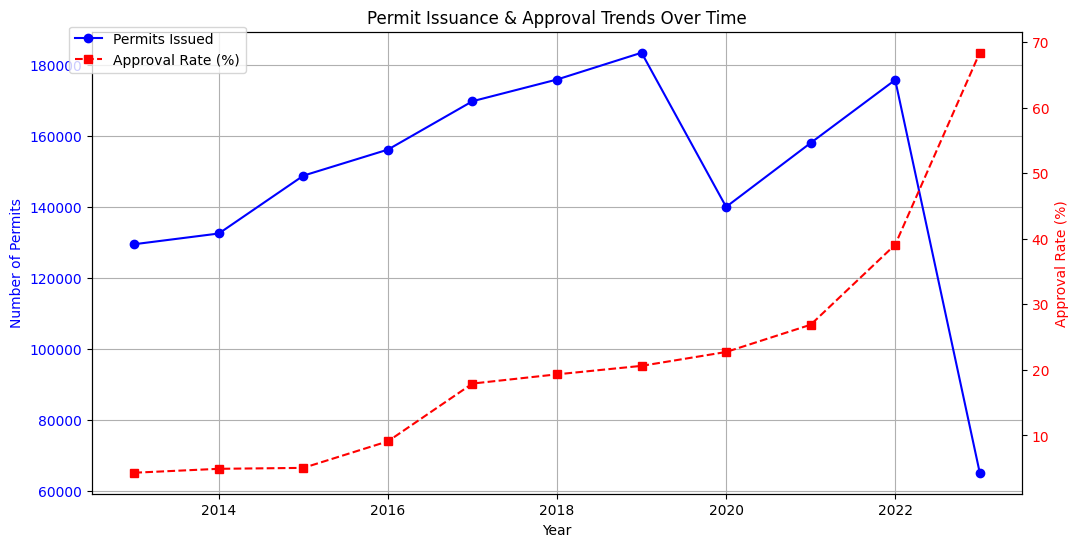

In [13]:
# Visualization
fig, ax1 = plt.subplots(figsize=(12, 6))

# Line: Permits issued over time
ax1.plot(permits_per_year.index, permits_per_year.values, marker="o", linestyle="-", color="b", label="Permits Issued")
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Permits", color="b")
ax1.tick_params(axis="y", labelcolor="b")
ax1.grid(True)

# Secondary Y-axis: Approval Rate
ax2 = ax1.twinx()
ax2.plot(approval_trend.index, approval_trend.values, marker="s", linestyle="--", color="r", label="Approval Rate (%)")
ax2.set_ylabel("Approval Rate (%)", color="r")
ax2.tick_params(axis="y", labelcolor="r")

# Title & Legend
plt.title("Permit Issuance & Approval Trends Over Time")
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.show()

Over the years, the approval rate has increased, possibly due to greater awareness of submitting correct applications. However, the number of permits issued has decreased, likely due to reduced construction activity. In 2020, when COVID-19 hit, permits dropped by approximately 22.2%. Later, they declined again by around 65%, possibly due to the addition of stricter permit restrictions.

## Q2

#### Part 01

In [14]:
# grouping
inspection_counts = inspections_df.groupby("Latitude/Longitude").size().reset_index(name="Inspection Count")
print(inspection_counts.shape)

# sorting
inspection_counts_sorted = inspection_counts.sort_values(by="Inspection Count", ascending=False)
print(inspection_counts_sorted.shape)  # just to check the shape

(435039, 2)
(435039, 2)


In [15]:
geo_table = pd.DataFrame({
    "Latitude/Longitude": inspection_counts_sorted["Latitude/Longitude"],
    "Number of Inspections": inspection_counts_sorted["Inspection Count"]
}).fillna(0) 

print(geo_table)

            Latitude/Longitude  Number of Inspections
25096    (33.94354, -118.4085)                  24607
158477  (34.05949, -118.42045)                  20903
25701   (33.94502, -118.40714)                  17301
26745   (33.94764, -118.37749)                  14782
25957   (33.94572, -118.40095)                  13672
...                        ...                    ...
373982  (34.23536, -118.57621)                      1
373979  (34.23536, -118.27038)                      1
373978  (34.23535, -118.43499)                      1
104281  (34.02908, -118.35889)                      1
435017   (34.32914, -118.4249)                      1

[435039 rows x 2 columns]


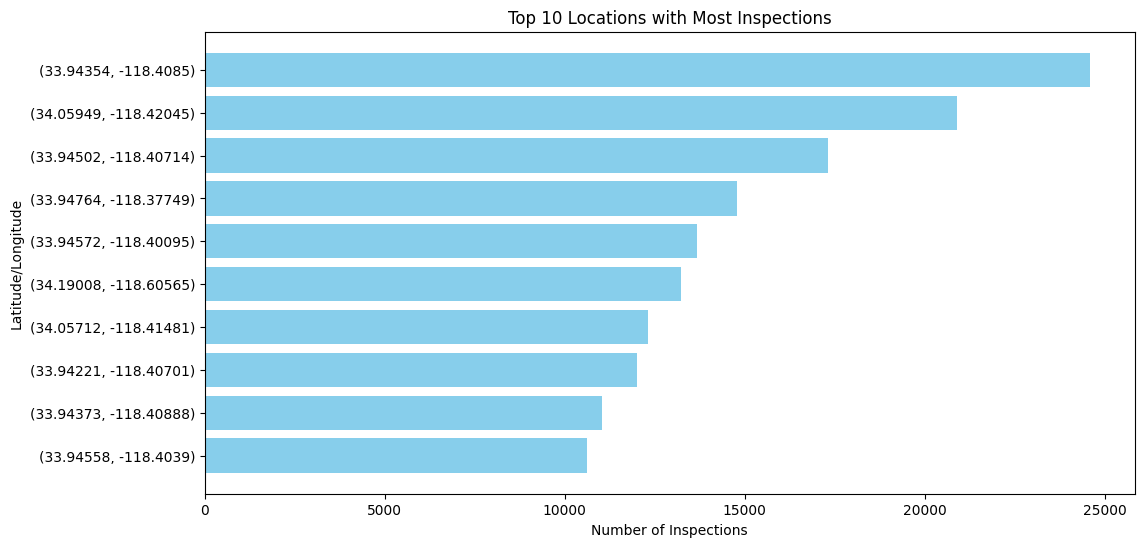

In [18]:

top_locations = inspection_counts_sorted.head(10)  # top 10 

plt.figure(figsize=(12, 6))
plt.barh(top_locations["Latitude/Longitude"], top_locations["Inspection Count"], color='skyblue')
plt.xlabel("Number of Inspections")
plt.ylabel("Latitude/Longitude")
plt.title("Top 10 Locations with Most Inspections")
plt.gca().invert_yaxis() 
plt.show()

In [21]:
# In this part take the help of the AI, since couldn't understand why number after decimal not working.

# Remove parentheses
geo_table["Latitude/Longitude"] = geo_table["Latitude/Longitude"].str.replace(r"[()]", "", regex=True)

# split the column into separate Latitude and Longitude columns
geo_table[['Latitude', 'Longitude']] = geo_table['Latitude/Longitude'].str.split(',', expand=True)


geo_table['Latitude'] = pd.to_numeric(geo_table['Latitude'], errors='coerce')
geo_table['Longitude'] = pd.to_numeric(geo_table['Longitude'], errors='coerce')

geo_table = geo_table.dropna(subset=['Latitude', 'Longitude'])

geo_table

,Latitude/Longitude,Number of Inspections,Latitude,Longitude
25096,"33.94354, -118.4085",24607,33.94354,-118.40850
158477,"34.05949, -118.42045",20903,34.05949,-118.42045
25701,"33.94502, -118.40714",17301,33.94502,-118.40714
26745,"33.94764, -118.37749",14782,33.94764,-118.37749
25957,"33.94572, -118.40095",13672,33.94572,-118.40095
...,...,...,...,...
373982,"34.23536, -118.57621",1,34.23536,-118.57621
373979,"34.23536, -118.27038",1,34.23536,-118.27038
373978,"34.23535, -118.43499",1,34.23535,-118.43499
104281,"34.02908, -118.35889",1,34.02908,-118.35889


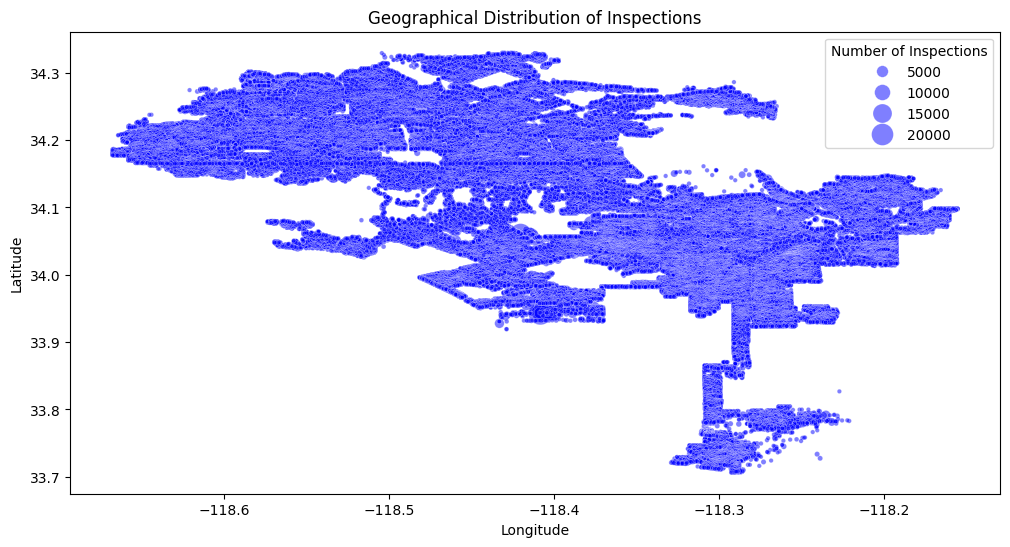

In [22]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=geo_table["Longitude"], 
    y=geo_table["Latitude"], 
    size=geo_table["Number of Inspections"], 
    sizes=(10, 300), alpha=0.5, color="blue"
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Distribution of Inspections")
plt.show()


Areas with higher latitudes tend to have a higher number of inspections, regardless of longitude. However, regions with lower latitude and higher longitude still show some inspection activity, though less frequently. Additionally, the middle area, where latitude ranges from 34.0 to 34.3 and longitude is between -118.55 and -118.39, has a noticeable concentration of inspections.

#### Part 02

In [23]:
# grouping by location and inspection result
inspection_results_geo = inspections_df.groupby(["Latitude/Longitude", "Inspection Result"]).size().reset_index(name="Count")

# sorting
inspection_results_sorted = inspection_results_geo.sort_values(by="Count", ascending=False)

print(inspection_results_sorted.shape)

(2281309, 3)


In [24]:
geo_Inspection_table = pd.DataFrame({
    "Latitude/Longitude": inspection_results_sorted["Latitude/Longitude"],
    "Inspection Result": inspection_results_sorted["Inspection Result"],
    "Count": inspection_results_sorted["Count"]
}).fillna(0) 

print(geo_Inspection_table)

             Latitude/Longitude         Inspection Result  Count
110277    (33.94354, -118.4085)      Conditional Approval   8741
110280    (33.94354, -118.4085)            Insp Scheduled   5789
832500   (34.05949, -118.42045)                  Approved   5472
813717   (34.05712, -118.41481)                  Approved   4691
118367   (33.94764, -118.37749)                  Approved   4559
...                         ...                       ...    ...
2281289  (34.32948, -118.42628)            Insp Scheduled      1
23       (33.70642, -118.28849)        SGSOV Not Required      1
22       (33.70642, -118.28849)            Permit Finaled      1
19        (33.7064, -118.29224)  Not Ready for Inspection      1
18        (33.7064, -118.29224)        Corrections Issued      1

[2281309 rows x 3 columns]


In [25]:
# Remove parentheses if they exist
geo_Inspection_table["Latitude/Longitude"] = geo_Inspection_table["Latitude/Longitude"].str.replace(r"[()]", "", regex=True)

# split the column into separate Latitude and Longitude columns
geo_Inspection_table[['Latitude', 'Longitude']] = geo_Inspection_table['Latitude/Longitude'].str.split(',', expand=True)


geo_Inspection_table['Latitude'] = pd.to_numeric(geo_Inspection_table['Latitude'], errors='coerce')
geo_Inspection_table['Longitude'] = pd.to_numeric(geo_Inspection_table['Longitude'], errors='coerce')

geo_Inspection_table = geo_Inspection_table.dropna(subset=['Latitude', 'Longitude'])

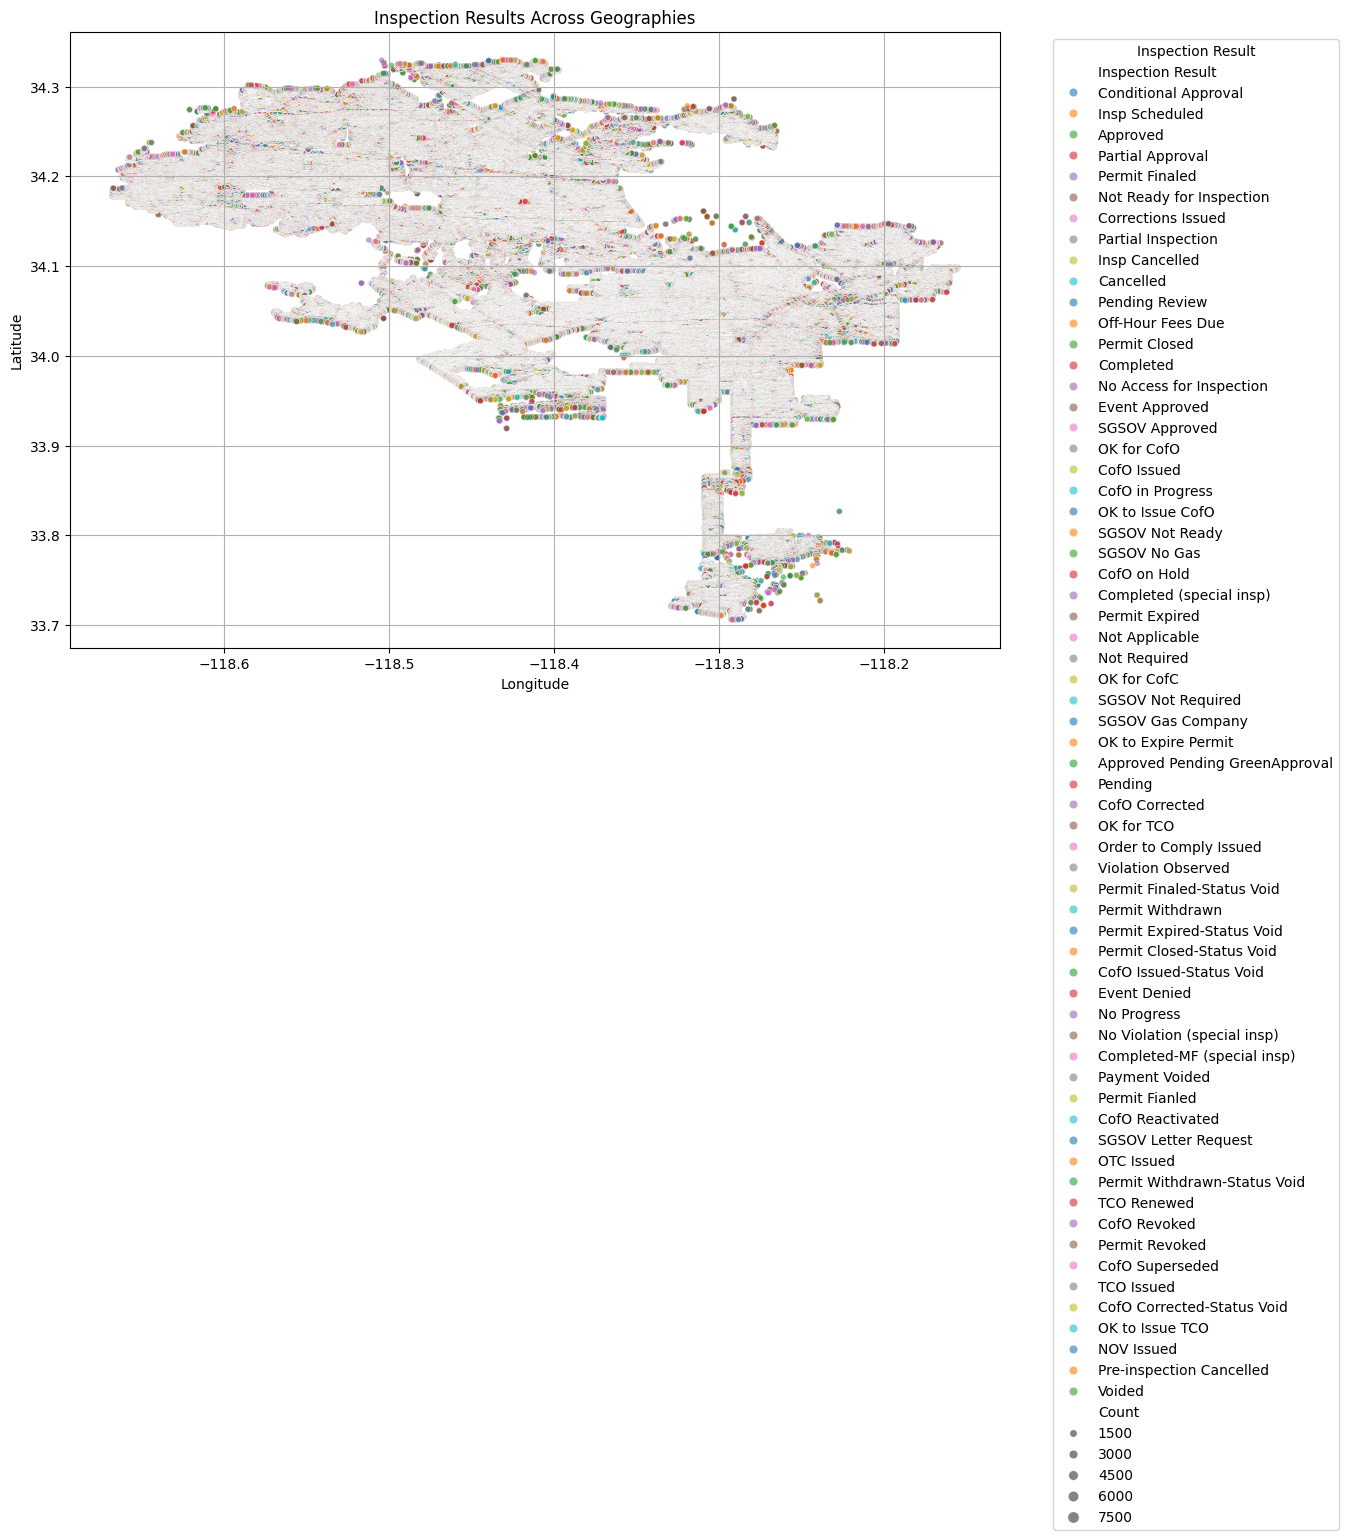

In [26]:
# Set color palette for different inspection results
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=geo_Inspection_table, 
    x="Longitude", 
    y="Latitude", 
    hue="Inspection Result", 
    size="Count",
    palette="tab10",  # Different colors for each result type
    alpha=0.6  # Adjust transparency for better visibility
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Inspection Results Across Geographies")
plt.legend(title="Inspection Result", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


#### Part 03

In [27]:
# Find permits that do not have a corresponding inspection
permits_without_inspections = permits_df[~permits_df["PCIS Permit #"].isin(inspections_df["PERMIT"])]

# Count the number of such permits
num_permits_without_inspections = permits_without_inspections.shape[0]

# Display the result
print(f"Number of permits without inspections: {num_permits_without_inspections}")


Number of permits without inspections: 1450488
